In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from rules import rules

In [2]:
datafile = "datasets/three.csv"
data = list(pd.read_csv(datafile)['Value'])

mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

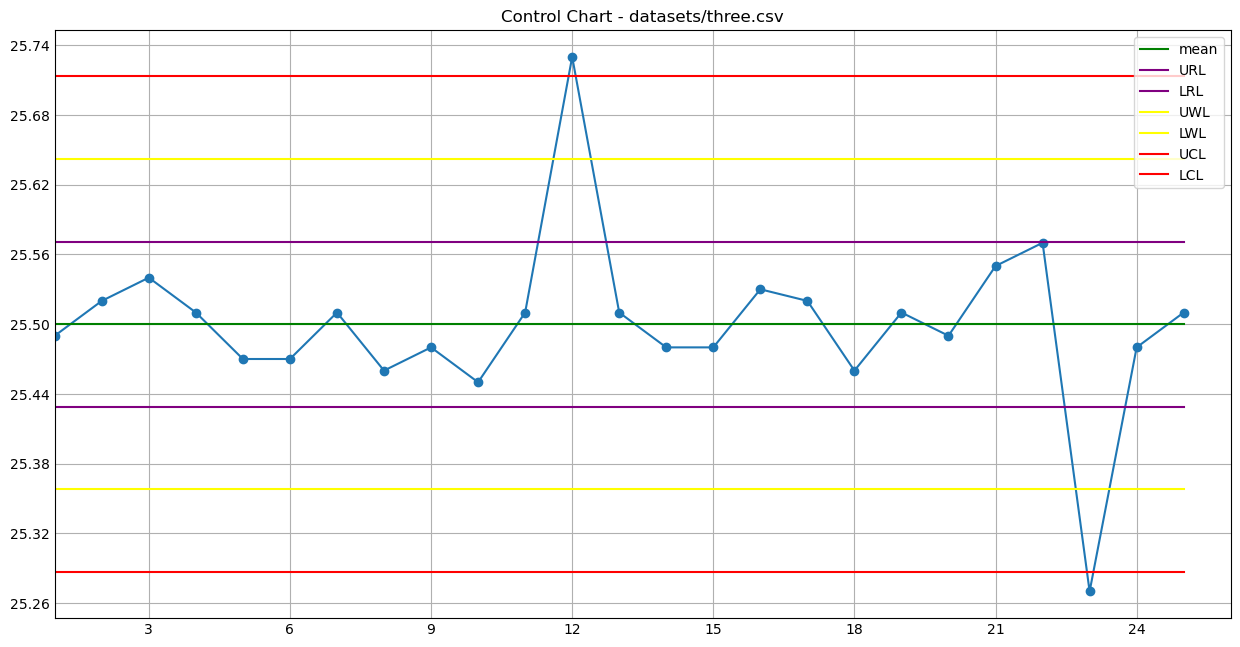

In [3]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(12, 6))

x = range(1, len(data)+1)
ax.plot(x, data, 'o-')

ax.plot(x, [mean]*len(x), color='green', label='mean')
ax.plot(x, [mean + std]*len(x), color='purple', label='URL')
ax.plot(x, [mean - std]*len(x), color='purple', label='LRL')
ax.plot(x, [mean + (2*std)]*len(x), color='yellow', label='UWL')
ax.plot(x, [mean - (2*std)]*len(x), color='yellow', label='LWL')
ax.plot(x, [mean + (3*std)]*len(x), color='red', label='UCL')
ax.plot(x, [mean - (3*std)]*len(x), color='red', label='LCL')

ax.set_xlim(1, len(data)+1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title(f"Control Chart - {datafile}")
plt.legend()
plt.savefig('images/control-chart.png', bbox_inches='tight')
plt.show()

In [4]:
issues = []

for rule in rules:
    issues = issues + rule.run(data, mean, std, verbose=True)

print("===== Detected Events =====")
for issue in issues:
    print(f"Rule: {issue[0]}, Point: {issue[1]}")

===== ControlLimitRule =====
sigmas: 3, window: 1, fail_count: 1
upper limit: 25.713316666015576
lower limit: 25.286683333984424
detected: [('ControlLimitRule', 12), ('ControlLimitRule', 23)]
===== WarningLimitRule =====
sigmas: 2, window: 3, fail_count: 2
upper limit: 25.64221111067705
lower limit: 25.35778888932295
detected: []
===== ZoneCLimitRule =====
sigmas: 1, window: 5, fail_count: 4
upper limit: 25.571105555338526
lower limit: 25.428894444661474
detected: []
===== SingleSideConsecutiveRule =====
detected: []
===== RunRule =====
detected: []
===== CycleRule =====
detected: []
===== ZoneCCycleRule =====
upper_limit: 25.571105555338526
lower_limit: 25.428894444661474
detected: []
===== MissingZoneCRule =====
upper_limit: 25.571105555338526
lower_limit: 25.428894444661474
detected: []
===== MissingZoneCRule =====
upper_limit: 25.571105555338526
lower_limit: 25.428894444661474
detected: []
===== NearLimitRule =====
nearness: 0.25
ucl: 25.713316666015576
lcl: 25.286683333984424
uwl:

AttributeError: 'NearLimitRule' object has no attribute 'sigma'